# Importing Libraries
Importing various libraries that are used in visualization and prediction of the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Data
Loading our churn_modelling dataset

In [2]:
df = pd.read_csv("../input/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Insights


In [3]:
# Column Headings

print(list(df.columns))

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [4]:
df.set_index('RowNumber')
df.RowNumber.count()

10000

In [5]:
# so we have 1000 rows of data with 14 column headings

In [6]:
# Further Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# 10,000 rows with no NaN value

In [8]:
#  Different Column Exploration
print(df["Geography"].unique())
print(df["Tenure"].unique())
print(df["NumOfProducts"].unique())

['France' 'Spain' 'Germany']
[ 2  1  8  7  4  6  3 10  5  9  0]
[1 3 2 4]


In [9]:
#Looking at the results we can say that we have 3 main geographical region in our dataset,i.e.,France,Spain and Germany.
#Following: [ 2  1  8  7  4  6  3 10  5  9  0] tenure
#And 4 different Number of Products

In [10]:
# Exited Count

pd.value_counts(df['Exited'].values, sort=False)

0    7963
1    2037
dtype: int64

In [11]:
# IsActive Count
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [12]:
#So we have approximately 8000 costumer who does not Exited and aprrox. 2000 count that Exited
#And Aprroximately 5000 are still active membert and approx. 4.8k are not an active member

In [13]:
# Stastical Analysis Of Dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Visualization

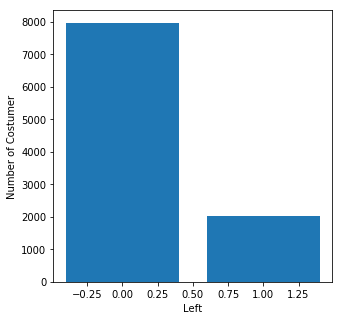

In [14]:
# Costumer Left

left=df.groupby('Exited').count()
plt.figure(figsize=(5,5))
plt.bar(left.index.values, left['RowNumber'])
plt.xlabel('Left')
plt.ylabel('Number of Costumer')
plt.show()

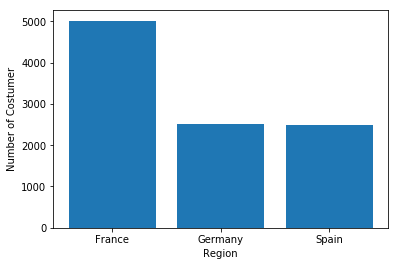

In [15]:
#  Number of costumer from each Region

region=df.groupby('Geography').count()
plt.bar(region.index.values, region['RowNumber'])
plt.xlabel('Region')
plt.ylabel('Number of Costumer')
plt.show()

In [16]:
# Most of the costumer are from France and number of costumer from Germany and Spain are equal.

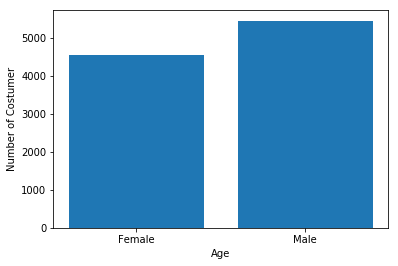

In [17]:
# Total count of costumer based on Gender

gender=df.groupby('Gender').count()
plt.bar(gender.index.values, gender['RowNumber'])
plt.xlabel('Age')
plt.ylabel('Number of Costumer')
plt.show()

In [18]:
# we have more male costumer than the female costumer

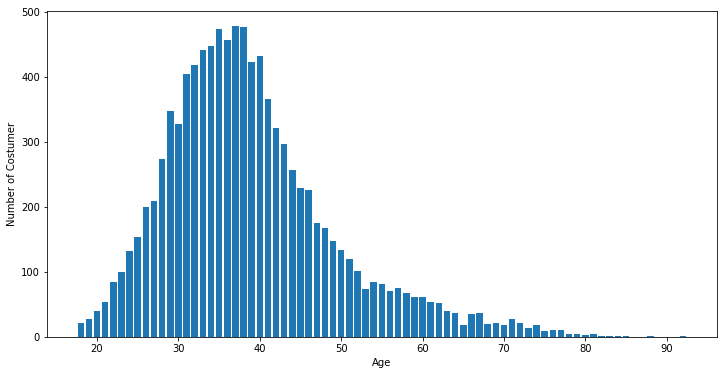

In [19]:
# Total count of costumer based on Different AgeGroup

age=df.groupby('Age').count()
plt.figure(figsize=(12,6))
plt.bar(age.index.values, age['RowNumber'])
plt.xlabel('Age')
plt.ylabel('Number of Costumer')
plt.show()

In [20]:
# most of the Costumer lies between age group of 25-50

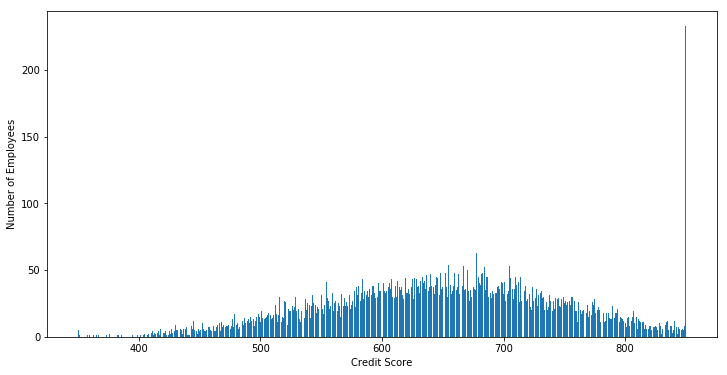

Max of Credit Score: 850
Costumers with max Credit Score: 233


In [21]:
# Total count of costumer based on Credit Score

cred_sco=df.groupby('CreditScore').count()
plt.figure(figsize=(12,6))
plt.bar(cred_sco.index.values, cred_sco['RowNumber'])
plt.xlabel('Credit Score')
plt.ylabel('Number of Employees')
plt.show()
print("Max of Credit Score:", df["CreditScore"].max())
count3=0
for i in df["CreditScore"]:
    if i==850:
        count3=count3+1
print("Costumers with max Credit Score:", count3)

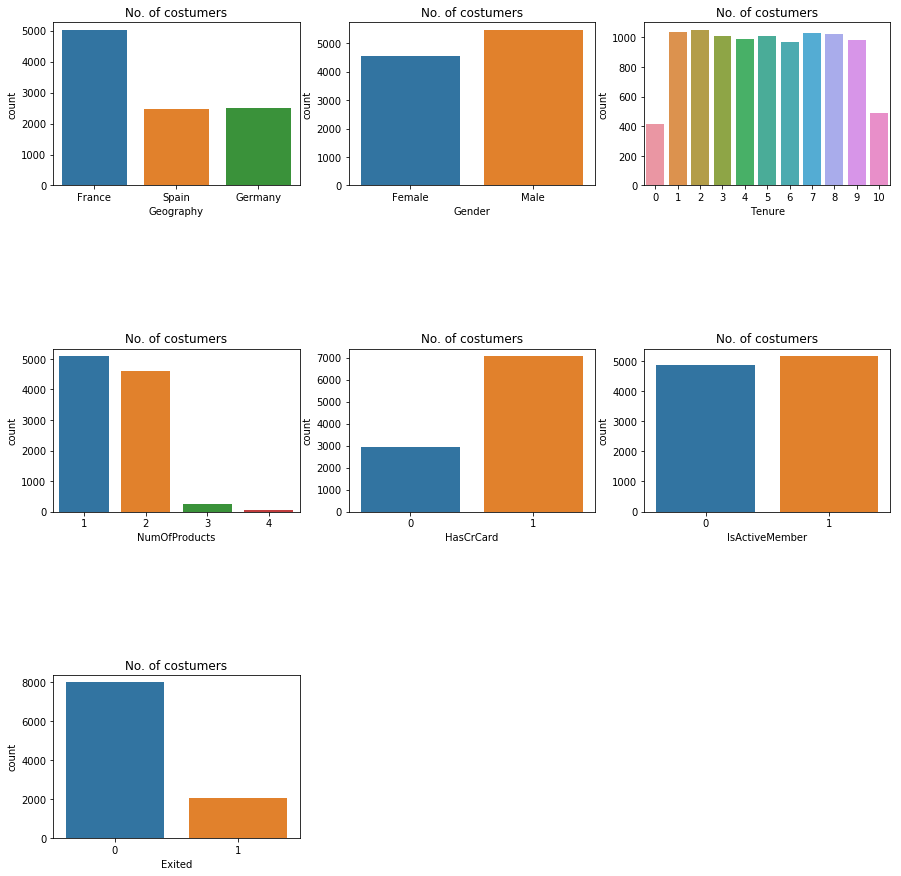

In [22]:
# Subplots For various parameters 

features=[ 'Geography', 'Gender','Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.title("No. of costumers")

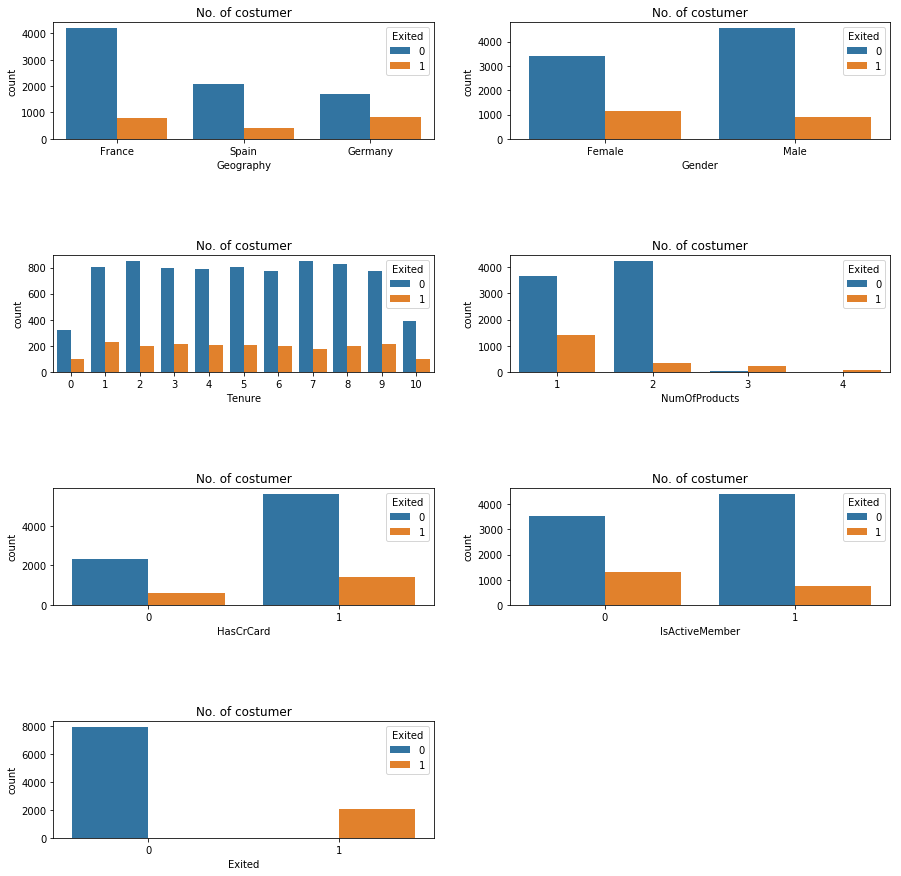

In [23]:
# plot based on Number of costumer who exited based on differnt parameters
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='Exited')
    plt.title("No. of costumer")

In [24]:
# In the plots shown above the Orange line represent the count of the costumer who "Exited"  
# title shows the Parameter on which it is counted 

# Building Prediction Model

In [25]:
# Data Preprocessing for developing model

In [26]:
# Keeping only those column which are useful for prediction 
#like RowNumber and CostumerID wont affect the prediction.
column_to_keep=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
df=df[column_to_keep]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
# Representing Gender and Age Value in Numeric 
df["Geography"][df["Geography"]=="France"]=1
df["Geography"][df["Geography"]=="Spain"]=2
df["Geography"][df["Geography"]=="Germany"]=3

df["Gender"][df["Gender"]=="Female"]=1
df["Gender"][df["Gender"]=="Male"]=2

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [28]:
#finding Correlation between parametrs 
corr=df.corr(method ='pearson') 
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


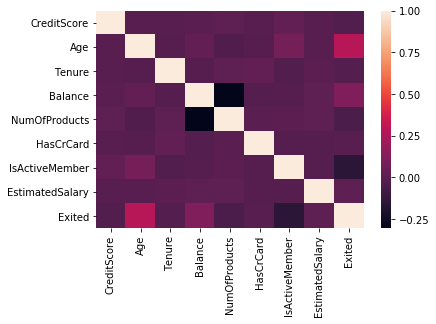

In [29]:
# Correlation Heatmap Using seaborn library
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

In [30]:
# Excluding "HasCrCard"  

column_to_keep2=['CreditScore', 'Geography', 'Gender', 'Age',"HasCrCard", 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Exited']
df=df[column_to_keep2]

In [31]:
# Preparing Data For Splitting And Testing
X=df.iloc[:,0:10]
Y=df.iloc[:,10]

# Developing Model

In [32]:
# Splitting Data In Training Set and Test Set 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.05,random_state = 0)
Y_train=Y_train.astype('int')

In [33]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LogisticRegression

In [34]:
# Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# Prediction
Y_pred = classifier.predict(X_test)

In [36]:
# Confusion Matrix For Evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[388  13]
 [ 75  24]]


In [37]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
# Model Precision
print("Precision:",metrics.precision_score(Y_test, Y_pred))
# Model Recall
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.824
Precision: 0.6486486486486487
Recall: 0.24242424242424243


# KNN 

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
classifier2.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [39]:
# Prediction
Y_pred2 = classifier2.predict(X_test)


In [40]:
# Confusion Matrix for evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred2)
print(confusion_matrix)

[[381  20]
 [ 50  49]]


In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred2))
# Model Precision
print("Precision:",metrics.precision_score(Y_test, Y_pred2))
# Model Recall
print("Recall:",metrics.recall_score(Y_test, Y_pred2))

Accuracy: 0.86
Precision: 0.7101449275362319
Recall: 0.494949494949495


# Results And Conclusion
The datasets is Visualized based on different criterion.
The prediction of CostumerChurn is performed using LogisticRegression with accuracy of 82.4% and
using KNN with accuracy of 86%.